In [1]:
# 라이브러리 버전확인

import sklearn

print(sklearn.__version__)

1.1.2


# 1. 필요한 모듈 import하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. 데이터 준비

### load_digits 메서드 사용

In [3]:
digits = load_digits()

In [4]:
print(dir(digits)) # 객체가 어떤 변수와 메소드를 가지고있는지 나열

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [5]:
digits.keys()  # 어떤 정보들이 담겨있는지 확인
# 총 7가지 정보

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digits_data = digits.data
print(digits_data.shape) # 배열의 형상정보 출력

(1797, 64)


In [7]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# 3. 데이터 이해하기

### Feature Data 지정하기

In [8]:
digits_data = digits.data

### Label Data 지정하기

In [9]:
digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

### Target Names 출력해 보기

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터 Describe 해 보기

In [11]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# 4. train, test 데이터 분리

In [12]:
import pandas as pd

print(pd.__version__)

1.4.3


### 문제지

In [13]:
# dataframe 자료형으로 변환
# 문제지
digits_df = pd.DataFrame(data= digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### 정답지

In [14]:
# 정답데이터 넣어주기
# 정답지
digits_df['label'] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### train, test 데이터 분리 

In [15]:
# 문제지, 정답지 준비  - 위에서 함
# X_train, X_test, y_train, y_test를 생성하는 방법을 참고
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 10)
# digits_data 문제지, feature , X
# digits_label 정답값, label , y
# test_size : 전체의 20%를 테스트 데이터로 쓰겠다


print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
#print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  1437 , X_test 개수:  360


In [16]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [17]:
X_test.shape, y_test.shape  

((360, 64), (360,))

In [18]:
y_train, y_test

(array([2, 1, 9, ..., 1, 8, 2]),
 array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
        6, 7, 8, 8, 5, 3, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
        2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
        0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
        8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
        3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
        2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
        4, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
        9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
        1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
        0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
        4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
        7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
     

# 5. 다양한 모델로 학습시켜보기

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)


classifier


In [20]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [21]:
y_pred = decision_tree.predict(X_test) # test 데이터로 예측
                                        # X_test데이터에는 정답인 label이 없고 
                                        # feature데이터만 존재
                                        # decision_tree 에 X_test 데이터로 predict
                                        # 실행하면 모델이 예측한 y_pred 도출
y_pred

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 3,
       6, 7, 8, 8, 5, 3, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 8, 4, 3, 8, 4, 9, 5, 9, 7, 8, 0, 4, 3, 1, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 3, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 9, 8, 0, 6, 8, 3, 0, 6, 7,
       7, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 2, 7, 2, 9, 5, 2, 3, 4, 4, 7, 6,
       2, 5, 4, 9, 3, 7, 6, 7, 2, 7, 4, 5, 3, 1, 9, 7, 4, 1, 8, 1, 4, 0,
       5, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 9, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 1, 4, 3, 3, 1, 4,
       1, 1, 1, 7, 1, 6, 4, 6, 9, 5, 1, 3, 5, 2, 9, 8, 8, 8, 2, 9, 1, 5,
       2, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 6, 5, 6, 1, 1, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 3, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 3, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 5, 6, 2, 2, 9, 8, 4, 7, 3, 3,

In [22]:
y_test # 실제정답 

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 3, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       4, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [23]:
#Decision Tree 정확도

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8611111111111112

### Random Forest 

In [24]:
#상위 모델들이 예측하는 편향된 결과보다, 다양한 모델들의 결과를 반영함으로써 
# 더 다양한 데이터에 대한 의사결정을 내릴 수 있게 한다

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 10)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      0.94      0.96        34
           2       0.92      1.00      0.96        34
           3       0.95      0.97      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.97      0.95        32
           6       1.00      1.00      1.00        37
           7       0.93      0.97      0.95        40
           8       0.97      0.88      0.92        33
           9       0.97      0.92      0.95        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### SVM

In [25]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### SGD Classifier

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)


sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.87      0.97      0.92        34
           2       0.94      1.00      0.97        34
           3       0.97      0.95      0.96        40
           4       1.00      0.91      0.95        34
           5       0.82      1.00      0.90        32
           6       1.00      0.97      0.99        37
           7       1.00      0.97      0.99        40
           8       0.87      0.82      0.84        33
           9       1.00      0.87      0.93        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=4000)

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       0.97      0.95      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       1.00      0.92      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



# 6. 모델을 평가해보기
# 예측결과 어떻게 해석?
# 성능을 평가하는 지표로는 무엇이 좋은지?
# 평가지표 중 적절한것
# 선택의 이유는?

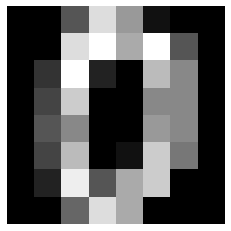

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [29]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [30]:
#  정확도
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9361111111111111

In [31]:
#길이는 y_pred와 같으면서 0으로만 이러어진 리스트를 fake_pred변수에 저장하고
# 이 리스트와 실제 정답인 y_test간의 정확도를 확인

fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

#### 불균형한 데이터에서 정확도가 높게 나올 수도 있음

In [32]:
# 오차행렬 확인

from sklearn.metrics import confusion_matrix
#왼쪽 위부터 순서대로 TP, FN, FP, TN의 개수
# 손글씨 문제에서 0은 Positive역할
# 3은 Negative 역할

# tp - 319
# fn - 14
# fp - 9
# tn - 18

confusion_matrix(y_test, y_pred)

array([[319,  14],
       [  9,  18]], dtype=int64)

In [33]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.56      0.67      0.61        27

    accuracy                           0.94       360
   macro avg       0.77      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [35]:
#fake_pred
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



In [36]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9361111111111111, 0.925)

## 모델 별 정확도 한번에 계산해보기

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 10)


# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(f'의사결정 나무 정확도 : {decision_tree_accuracy}')


# Random Forest 
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_pred)
print(f'랜덤숲 정확도 : {random_forest_accuracy}')


# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

svm_model_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM 정확도 : {svm_model_accuracy}')


# SGD Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

sgd_model_accuracy = accuracy_score(y_test, y_pred)
print(f'SGD 정확도 : {sgd_model_accuracy}')


# Logistic Regression
logistic_model = LogisticRegression(max_iter=4000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

logistic_model_accuracy = accuracy_score(y_test, y_pred)
print(f'로지스틱 정확도 : {logistic_model_accuracy}')

의사결정 나무 정확도 : 0.8611111111111112
랜덤숲 정확도 : 0.9583333333333334
SVM 정확도 : 0.9833333333333333
SGD 정확도 : 0.9333333333333333
로지스틱 정확도 : 0.9527777777777777


## 예측결과==============


### 정확도를 살펴보니 SVM 모델이 0.98로 가장 정확도가 높게 나온걸 확인했다


## =====================

In [38]:
# SVM 모델로 다시 계산하고 평가지표 보기

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 10)




# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)        # 학습
y_pred = svm_model.predict(X_test)     # 예측

svm_model_accuracy = accuracy_score(y_test, y_pred)    #정확도 구하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [39]:
# 오차행렬
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

# 성능을 평가하는 지표로는 무엇이 좋은지?
# 평가지표 중 적절한것
# 선택의 이유는?

정확성을 지표로 하는것도 좋지만,

label(정답)이 불균형하게 분포되어있어 잘못된 정확성을 나타낼 수 도 있을것 같다는 생각이 든다


precision과 recall 중 선택해야한다면

두 지표 모두 모델의 성능을 확인하는데 중요하다고 생각하고

둘 다 사용되어야한다고 생각

->

precision과 recall의 조화평균인 f1 score가 적당할것같다
